Best solution: x = 0.9207, value = -3.0568


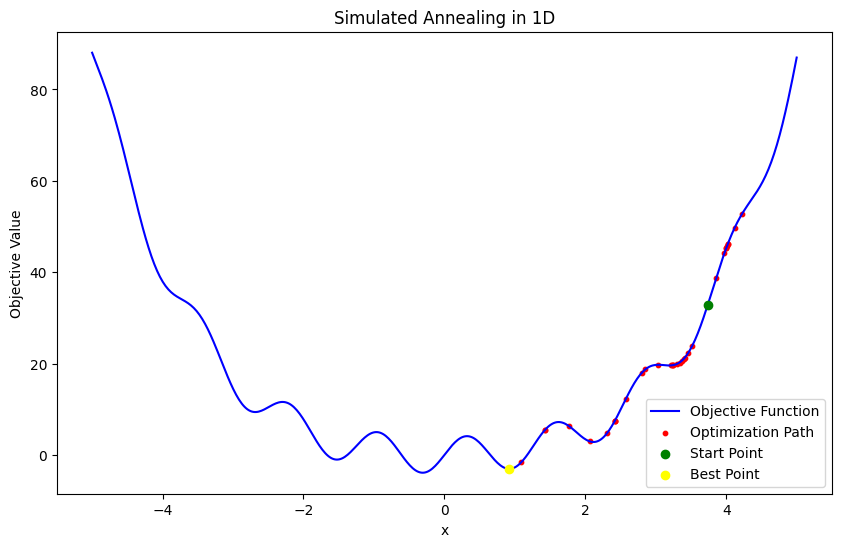

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (e.g., a simple 1D quadratic function)
def objective_function(x):
    return x**2 + 4 * np.sin(5 * x) + 0.1 * x**4

# Simulated Annealing algorithm
def simulated_annealing_1d(objective, bounds, max_iter, initial_temp, cooling_rate):
    # Initialize variables
    x = np.random.uniform(bounds[0], bounds[1])
    current_value = objective(x)
    best_x, best_value = x, current_value

    # Store history for visualization
    history = [(x, current_value)]

    temp = initial_temp
    for i in range(max_iter):
        # Generate a new candidate solution
        new_x = x + np.random.uniform(-0.5, 0.5)
        new_x = np.clip(new_x, bounds[0], bounds[1])  # Ensure within bounds
        new_value = objective(new_x)

        # Acceptance probability
        delta = new_value - current_value
        if delta < 0 or np.random.rand() < np.exp(-delta / temp):
            x, current_value = new_x, new_value

        # Update the best solution
        if current_value < best_value:
            best_x, best_value = x, current_value

        # Cool down the temperature
        temp *= cooling_rate

        # Store history
        history.append((x, current_value))

    return best_x, best_value, history

# Visualization of the optimization process
def visualize_1d(history, bounds, objective):
    # Create a grid for the objective function
    x = np.linspace(bounds[0], bounds[1], 500)
    y = objective(x)

    # Plot the objective function
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="Objective Function", color="blue")

    # Plot the optimization path
    history = np.array(history)
    plt.scatter(history[:, 0], history[:, 1], color="red", s=10, label="Optimization Path")
    plt.scatter(history[0, 0], history[0, 1], color="green", label="Start Point", zorder=5)
    plt.scatter(history[-1, 0], history[-1, 1], color="yellow", label="Best Point", zorder=5)

    plt.title("Simulated Annealing in 1D")
    plt.xlabel("x")
    plt.ylabel("Objective Value")
    plt.legend()
    plt.show()

# Parameters
bounds = [-5, 5]           # Bounds for x
max_iter = 1000             # Maximum number of iterations
initial_temp = 30          # Initial temperature
cooling_rate = 0.9         # Cooling rate

# Run simulated annealing
best_x, best_value, history = simulated_annealing_1d(objective_function, bounds, max_iter, initial_temp, cooling_rate)

# Print the best solution
print(f"Best solution: x = {best_x:.4f}, value = {best_value:.4f}")

# Visualize the optimization process
visualize_1d(history, bounds, objective_function)

<ipython-input-48-34da2353ec8f>:41: RuntimeWarning: divide by zero encountered in divide
  max_scale = np.minimum(1/np.abs(x), np.minimum(1/np.abs(y), 1/np.abs(z)))


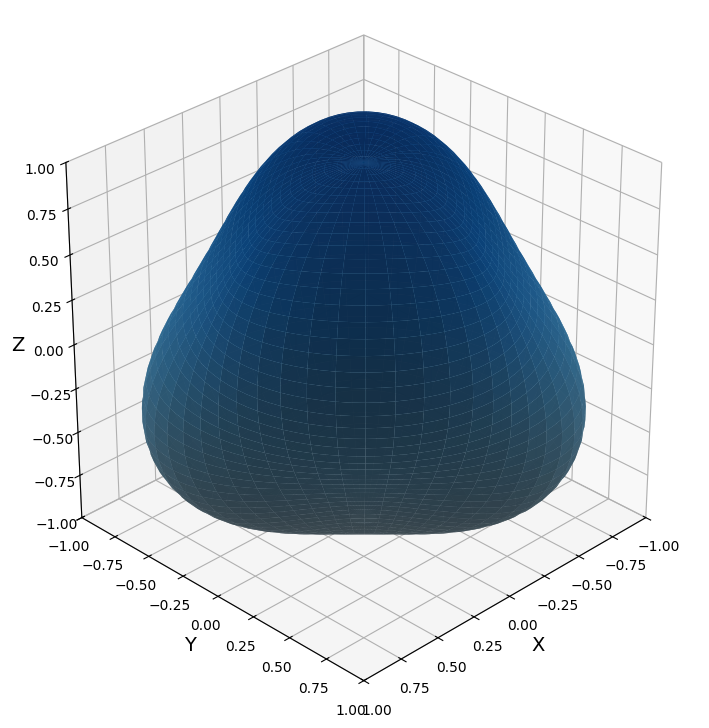

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a parametric representation of the elliptope boundary
# Using spherical coordinates to create a smooth surface
u = np.linspace(0, 2*np.pi, 100)  # Longitude
v = np.linspace(0, np.pi, 50)     # Latitude
u_grid, v_grid = np.meshgrid(u, v)

# Start with a unit sphere
x_sphere = np.cos(u_grid) * np.sin(v_grid)
y_sphere = np.sin(u_grid) * np.sin(v_grid)
z_sphere = np.cos(v_grid)

# We'll scale each point to find the exact elliptope boundary where:
# 1 + 2xyz - x² - y² - z² = 0
def find_scale_factor(x, y, z):
    # Quadratic formula coefficients: a*r² + b*r + c = 0
    a = -(x**2 + y**2 + z**2)
    b = 2*x*y*z
    c = 1

    # For points where the discriminant is positive, use the positive root
    discriminant = b**2 - 4*a*c
    valid = discriminant >= 0

    # Initialize scale factors
    scale = np.ones_like(x)

    # Where valid, compute the scale factor
    scale[valid] = (-b[valid] + np.sqrt(discriminant[valid])) / (2*a[valid])
    scale[~valid] = 1  # Default for invalid points

    # Clip to ensure we stay within the unit cube
    max_scale = np.minimum(1/np.abs(x), np.minimum(1/np.abs(y), 1/np.abs(z)))
    return np.minimum(scale, max_scale)

# Find the scale factor for each direction
scale = find_scale_factor(x_sphere, y_sphere, z_sphere)

# Apply scaling to find the elliptope boundary
x = x_sphere * scale
y = y_sphere * scale
z = z_sphere * scale

# Create a smooth color gradient based on height
colors = cm.Blues(0.3 + 0.7*(z + 1)/2)

# Plot the smooth surface
surf = ax.plot_surface(x, y, z, facecolors=colors,
                      antialiased=True, shade=True,
                      alpha=0.9, linewidth=0)

# Set labels with larger font
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('Z', fontsize=14)

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Set optimal viewing angle
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Make room for the title
plt.show()

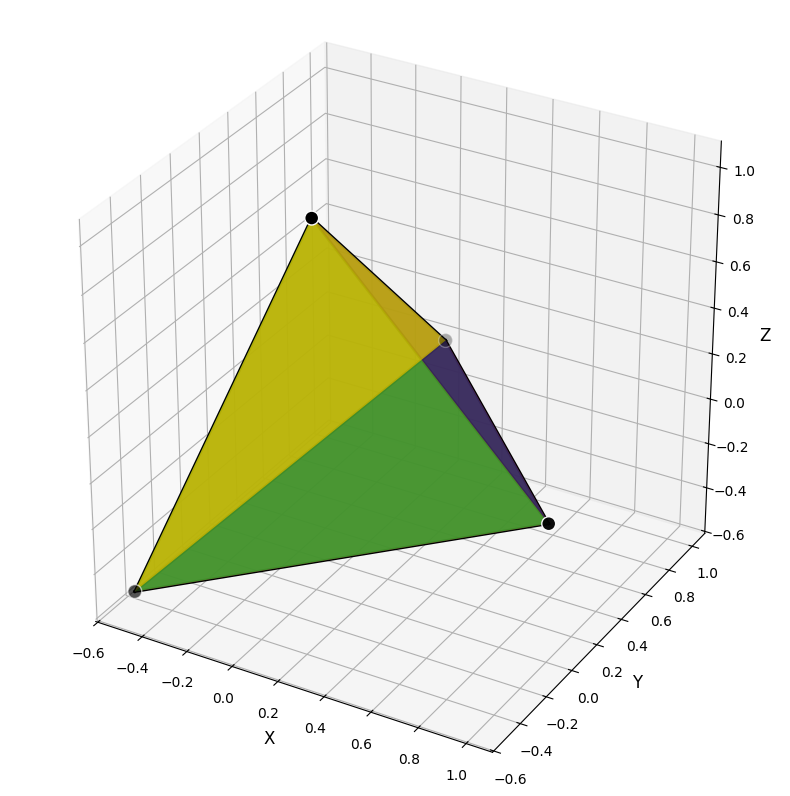

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create a figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define a tetrahedron spectahedron
vertices = np.array([
    [1, 0, 0],    # First vertex
    [0, 1, 0],    # Second vertex
    [0, 0, 1],    # Third vertex
    [-0.5, -0.5, -0.5]  # Fourth vertex
])

# Create faces using triangulation
faces = np.array([
    [0, 1, 2],  # Face 1
    [0, 1, 3],  # Face 2
    [0, 2, 3],  # Face 3
    [1, 2, 3]   # Face 4
])

# Plot each triangular face with a different color
colors = ['royalblue', 'crimson', 'limegreen', 'gold']

for i, face in enumerate(faces):
    vtx = vertices[face]
    tri = ax.plot_trisurf(vtx[:, 0], vtx[:, 1], vtx[:, 2],
                          color=colors[i], alpha=0.8, shade=True)

# Add vertices as scatter points
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
           color='black', s=100, edgecolor='white')

# Add edges
for i in range(4):
    for j in range(i+1, 4):
        ax.plot([vertices[i,0], vertices[j,0]],
                [vertices[i,1], vertices[j,1]],
                [vertices[i,2], vertices[j,2]], 'k-', lw=2)

# Set labels and title
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.show()

In [39]:
import numpy as np

def generate_feasible_lp(num_vars=100, num_eq=50, seed=42, target=10.0):
    np.random.seed(seed)
    # Generate a strictly positive feasible point x0 in [1, 10]
    x0 = np.random.uniform(low=1.0, high=10.0, size=num_vars)
    # Generate a dense A with moderate values to avoid extreme scaling issues
    A = np.random.uniform(low=0.1, high=5.0, size=(num_eq, num_vars))
    # Compute b = A @ x0; guarantees feasibility (Ax0 = b)
    b = A @ x0
    # Generate objective coefficients c with moderate values
    c = np.random.uniform(low=0.1, high=5.0, size=num_vars)

    # Scale A, b, c so that the maximum absolute value becomes 'target'
    current_scale = np.max(np.abs(A))
    scaling_factor = target / current_scale
    A = A * scaling_factor
    b = b * scaling_factor
    c = c * scaling_factor

    return A, b, c, x0

def save_lp(filename, A, b, c):
    # Save LP data in a simple text format:
    # Line 1: num_vars num_eq
    # Line 2: c coefficients (space-separated)
    # Next num_eq lines: each constraint row of A (space-separated)
    # Last line: b vector (space-separated)
    num_eq, num_vars = A.shape
    with open(filename, "w") as f:
        f.write(f"{num_vars} {num_eq}\n")
        f.write(" ".join(map(str, c)) + "\n")
        for i in range(num_eq):
            f.write(" ".join(map(str, A[i,:])) + "\n")
        f.write(" ".join(map(str, b)) + "\n")

if __name__ == "__main__":
    A, b, c, x0 = generate_feasible_lp(num_vars=1000, num_eq=500)
    save_lp("feasible_lp.txt", A, b, c)
    print("Feasible LP saved to 'feasible_lp.txt' with target magnitude around 10.")


Feasible LP saved to 'feasible_lp.txt' with target magnitude around 10.


In [41]:
import numpy as np
from scipy.optimize import linprog

def solve_lp(filename):
    try:
        with open(filename, 'r') as f:
            lines = f.readlines()

        # Parse the data
        num_vars, num_eq = map(int, lines[0].split())
        c = np.array(list(map(float, lines[1].split())))
        A_eq = np.array([list(map(float, line.split())) for line in lines[2:2 + num_eq]])
        b_eq = np.array(list(map(float, lines[-1].split())))

        # Solve the linear program
        result = linprog(c, A_eq=A_eq, b_eq=b_eq)

        if result.success:
            print("Solution found:")
            print("Optimal value:", result.fun)
            print("Optimal solution:", result.x)
        else:
            print("Optimization failed:", result.message)
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

solve_lp("/content/feasible_lp105.txt")


Solution found:
Optimal value: 146.7856875512574
Optimal solution: [10.89728259 21.61651275  0.          2.80773837  0.          2.56846227
  0.          0.         13.33710277  0.        ]
